<br>
<h1 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #e6e6ff ; color :  #17202a ; text-align: center; border-radius: 80px 80px;">CAPSTONE PROJECT - EMPLOYEE  ATTRITION  PREDICTION</h1>
<br>

## Table of Contents:


* ### [Introduction](#introduction)

* ### [Scraped Data EDA](#eda)

* ### [Handling Categorical Data](#cat_data)

* ### [Features](#feature)

* ### [Modeling](#modeling)

* ### [Saving The Final Model](#model)

## Introduction: <a class="anchor" id="introduction"></a>

The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else. In the spirit of Kaggle, let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this synthetically generated IBM dataset.

### Let's dive into it...

#### Import necessary libraries

In [1]:
#import python libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import algorithms to use

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

#Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler

#library for splitting data into train and test

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

#library for cross validation

from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV
#from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

#### Read 'HR-Employee-Attrition.csv' dataset 

In [2]:
data = pd.read_csv("HR-Employee-Attrition.csv")

#### First five rows

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Last five rows

In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


#### Shape of dataset

In [5]:
data.shape

(1470, 35)

#### view information about dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### basic statistical information about dataset

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Check missing values in dataset

In [8]:
data.isnull().sum() 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Check duplicated rows in the dataset

In [9]:
data.duplicated().sum()

0

## Scraped Data EDA: <a class="anchor" id="eda"></a>

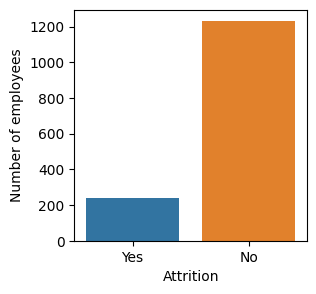

In [10]:
plt.figure(figsize = (3, 3))
sns.countplot(x = data['Attrition'])
plt.ylabel('Number of employees')
plt.show()

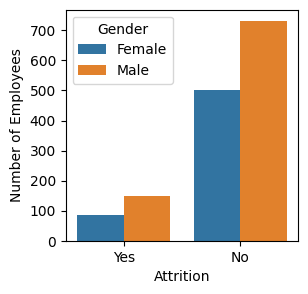

In [11]:
plt.figure(figsize = (3, 3))
sns.countplot(x = data['Attrition'], hue = data['Gender'])
plt.ylabel('Number of Employees')
plt.show()

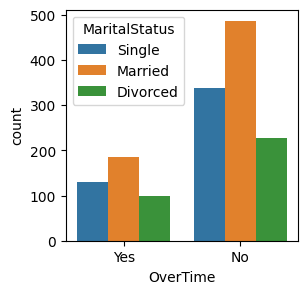

In [12]:
plt.figure(figsize = (3, 3))
sns.countplot(x = data['OverTime'], hue = data['MaritalStatus'])
plt.show()

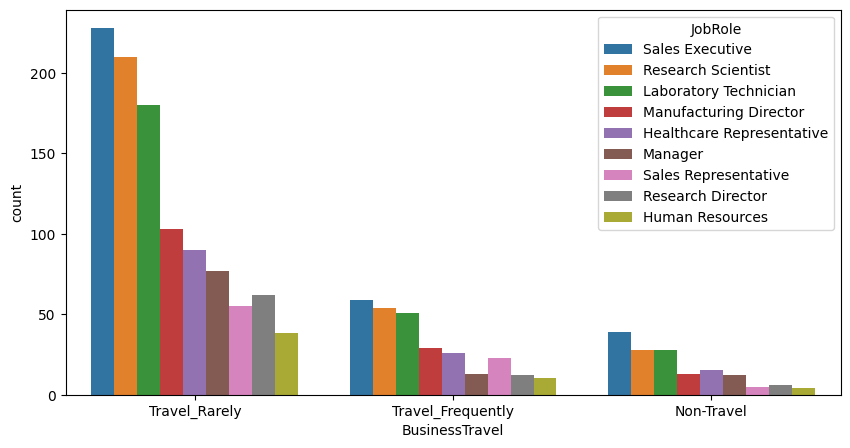

In [13]:
plt.figure(figsize = (10, 5))
sns.countplot(x = data['BusinessTravel'], hue = data['JobRole'])
plt.show()

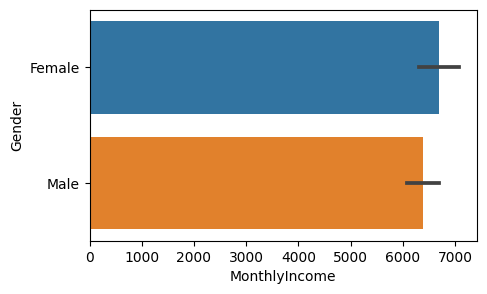

In [14]:
plt.figure(figsize = (5, 3))
sns.barplot(x = 'MonthlyIncome', y = 'Gender', data = data)
plt.show()

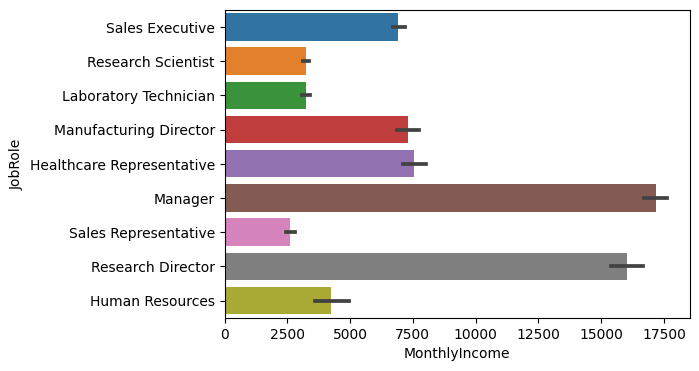

In [15]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'MonthlyIncome', y = 'JobRole', data = data) 
plt.show()

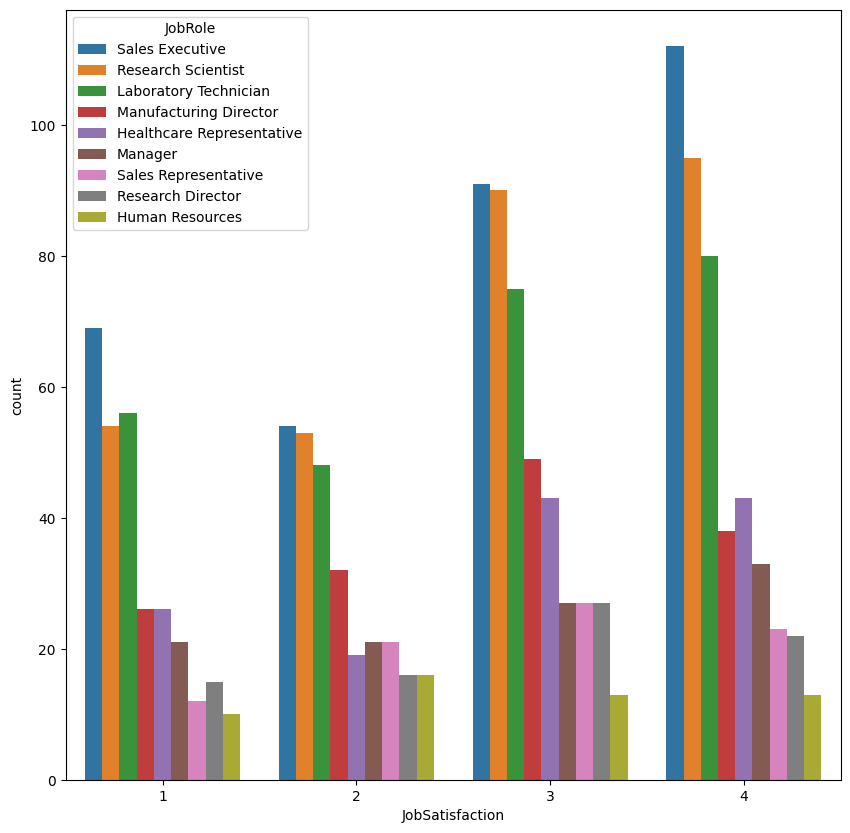

In [16]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'JobSatisfaction', hue = 'JobRole', data = data)
plt.show()

### Univariate Analysis

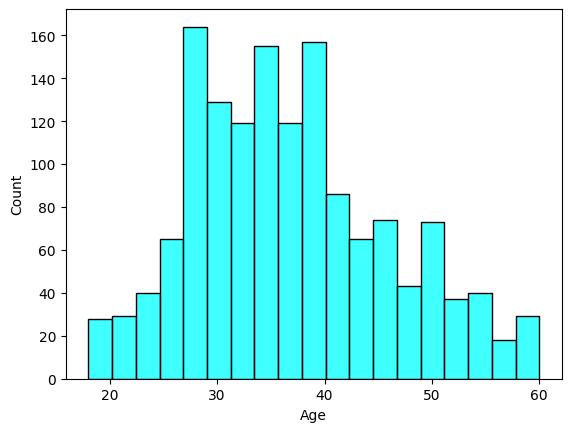

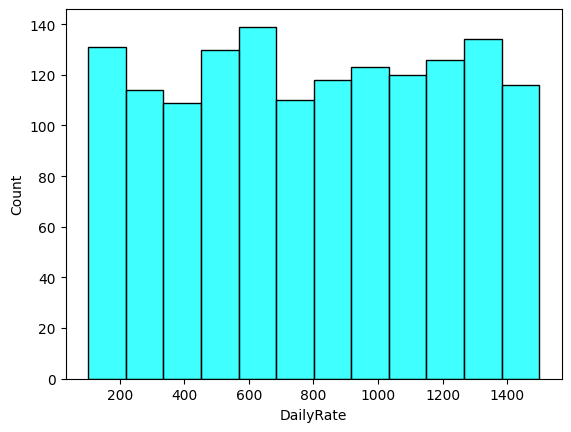

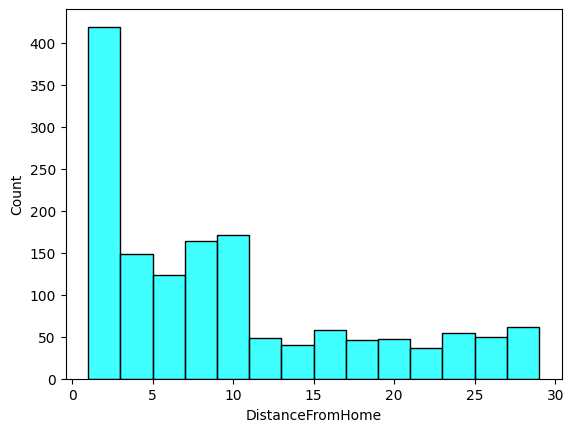

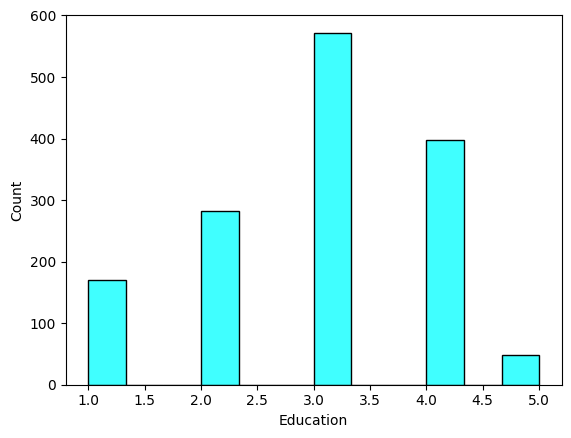

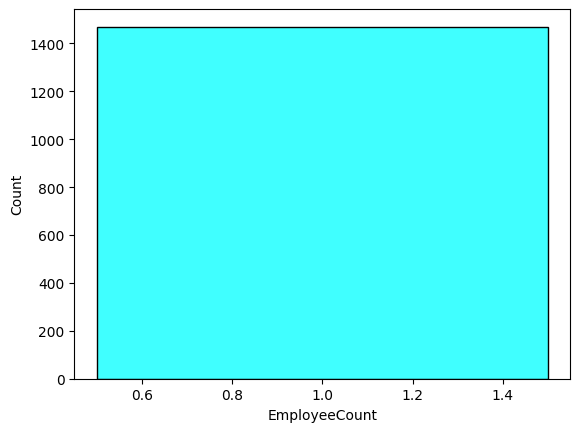

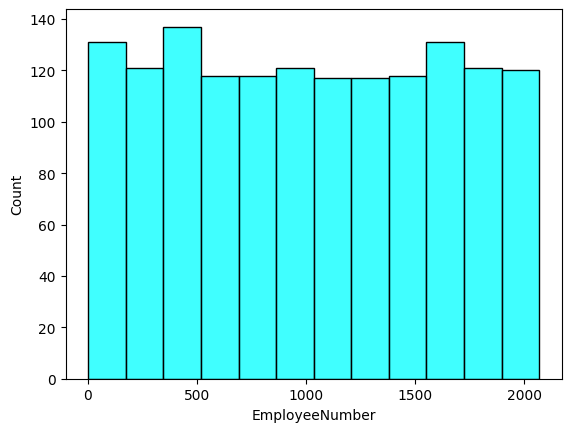

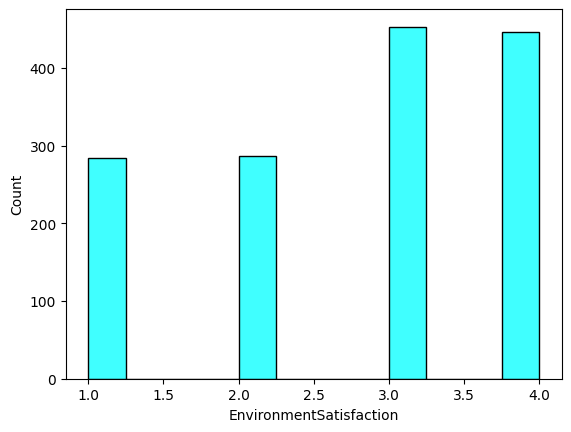

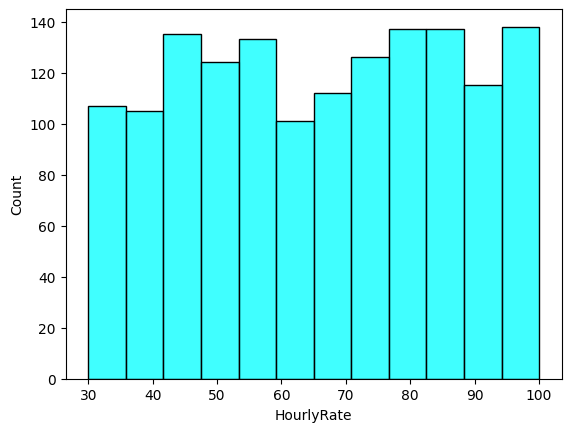

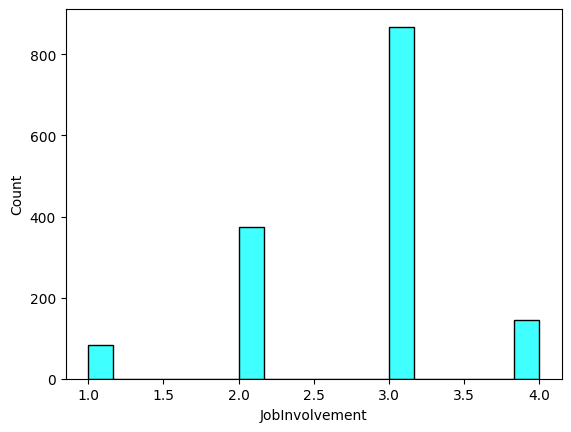

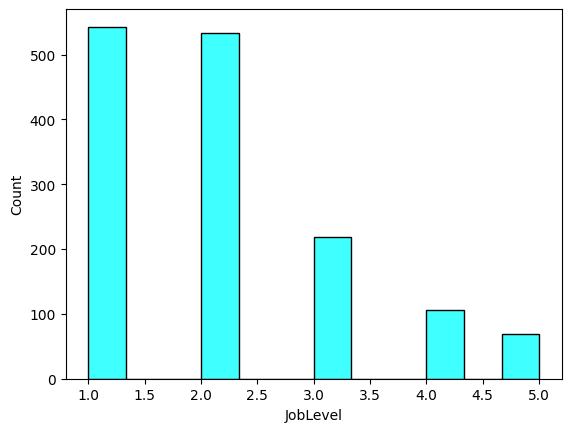

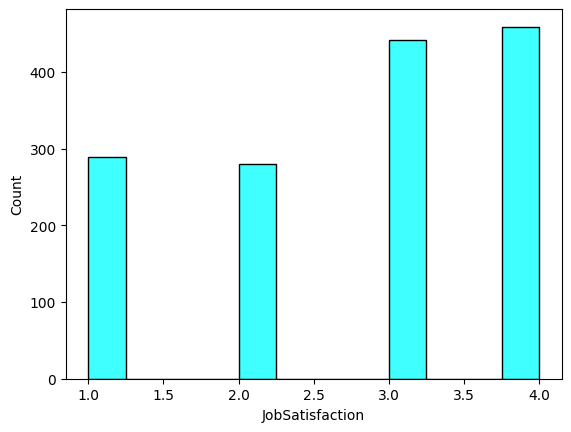

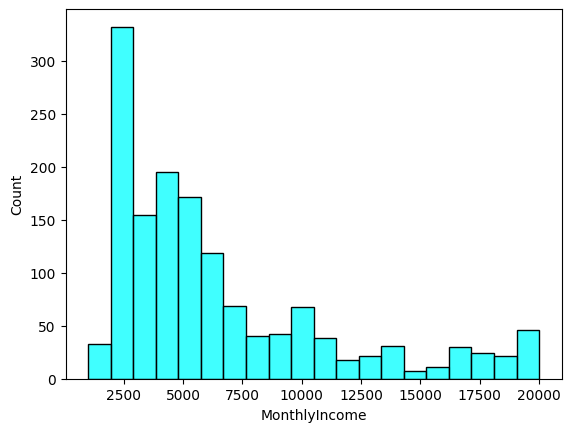

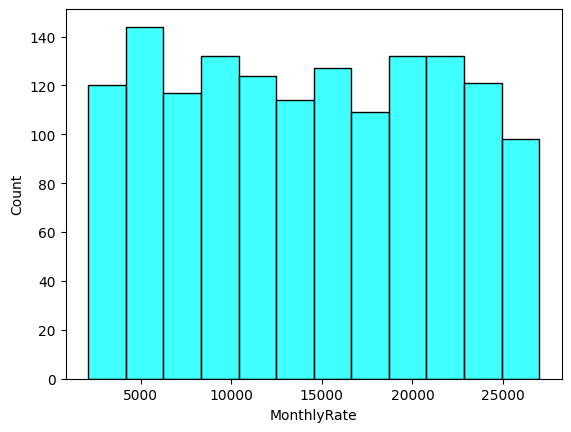

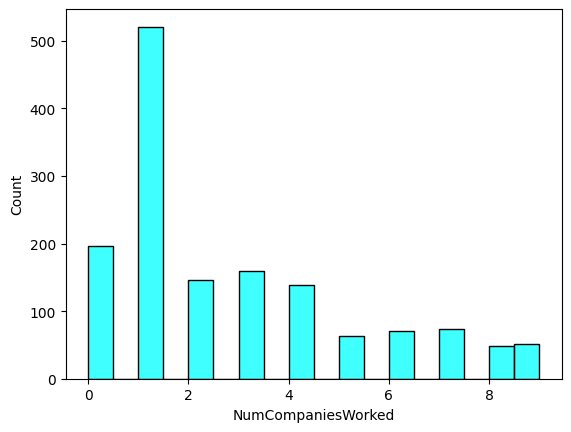

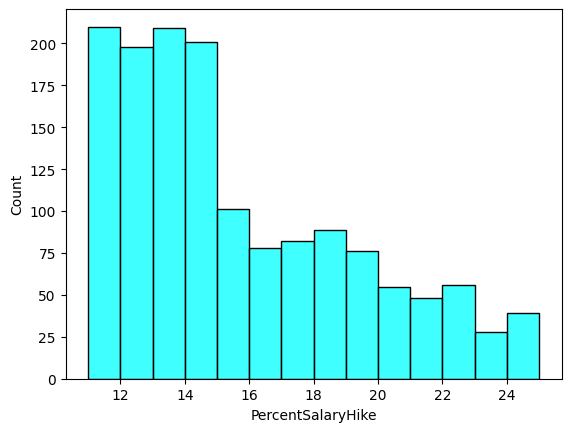

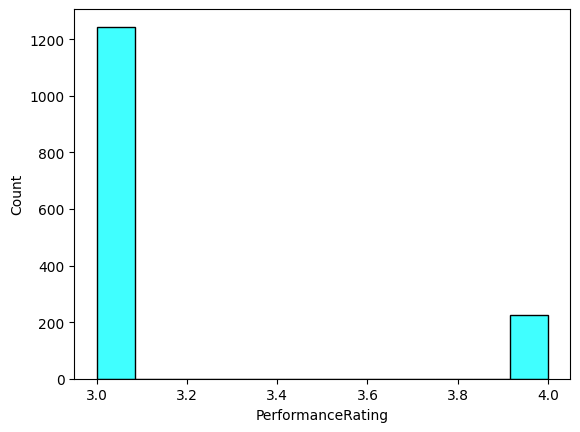

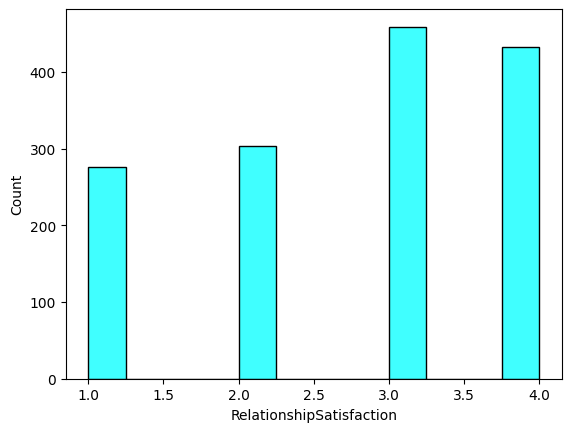

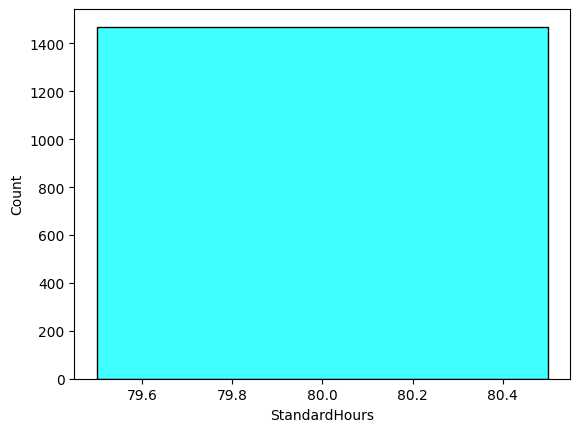

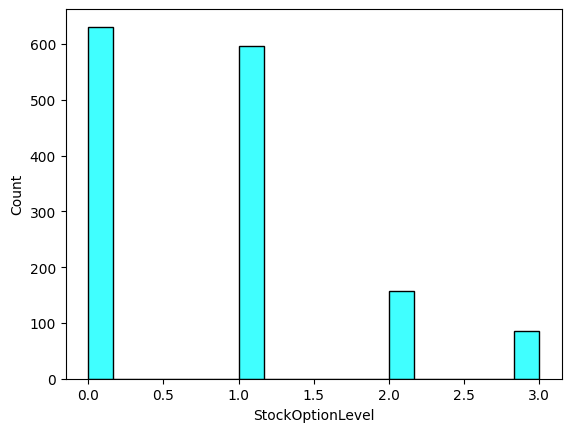

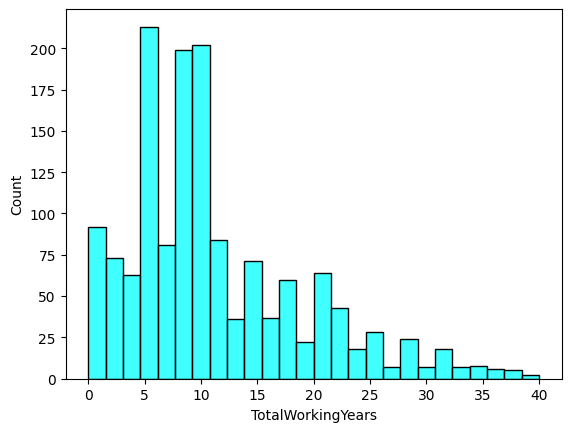

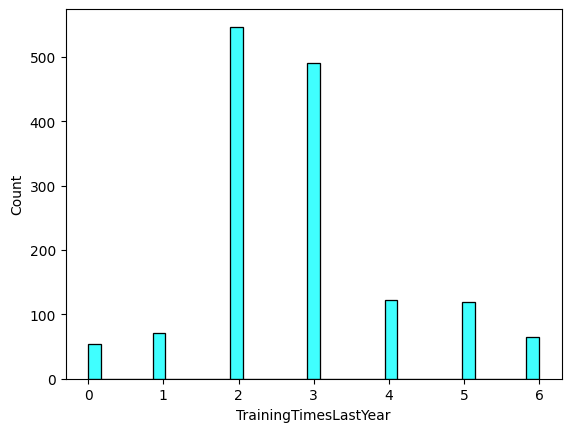

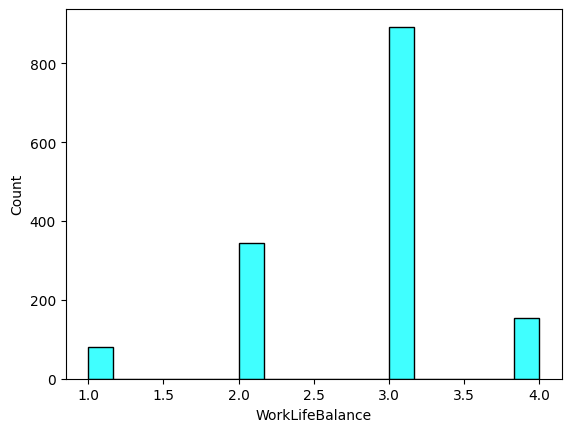

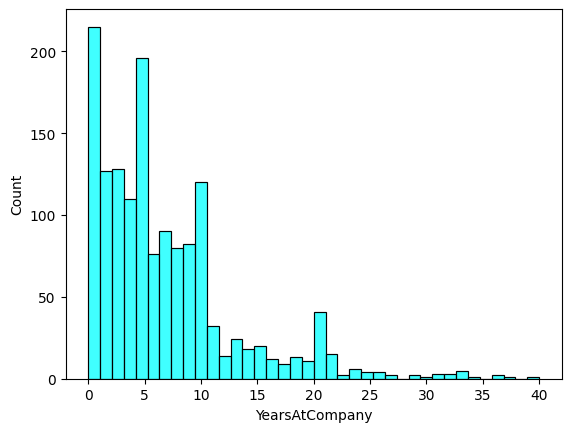

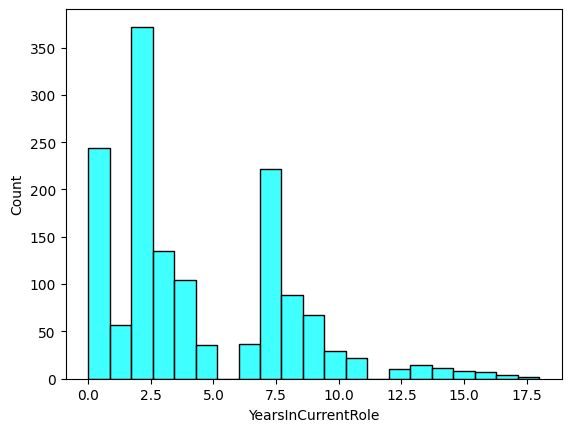

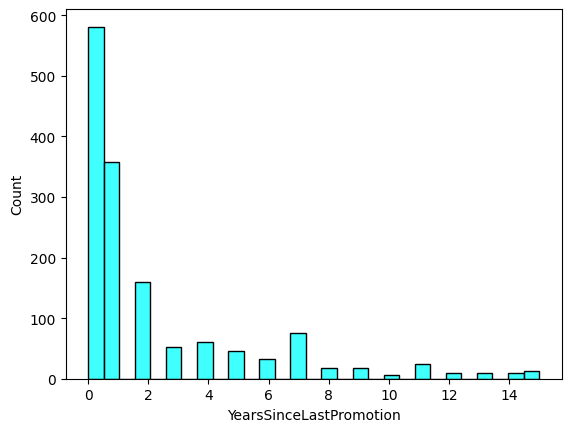

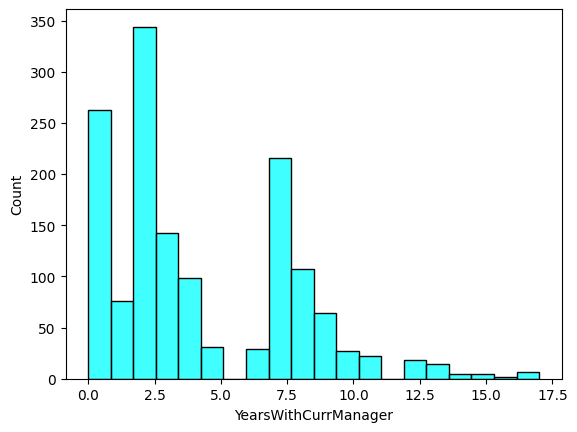

In [17]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x = data[i], color = "cyan")
        plt.show()

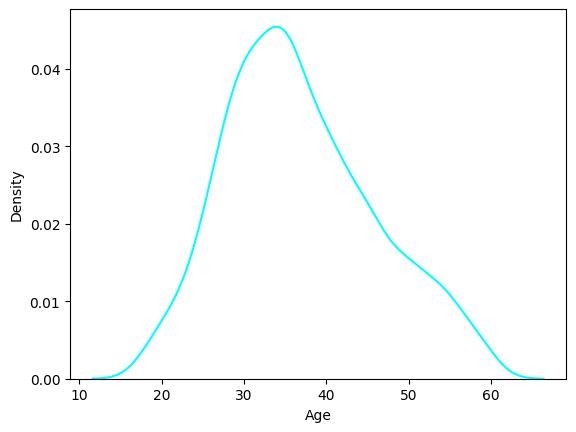

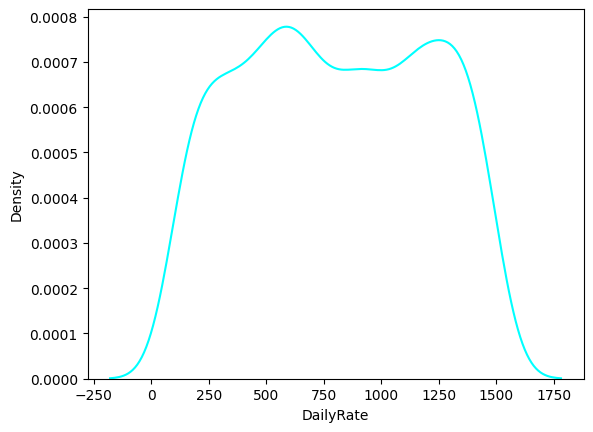

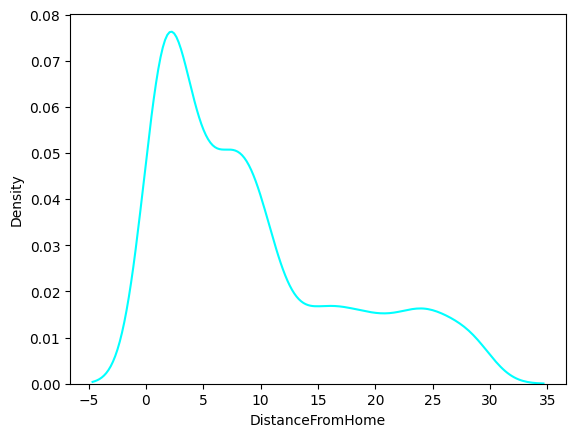

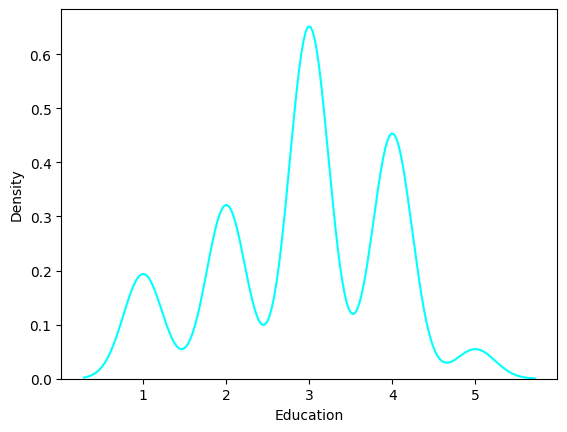

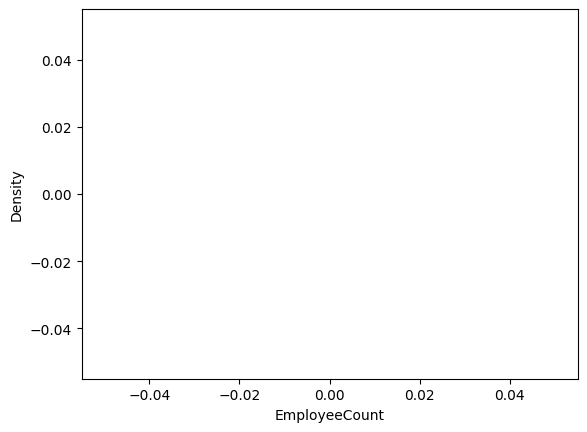

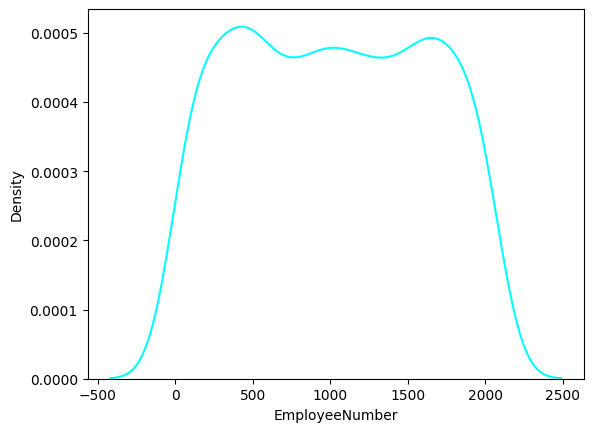

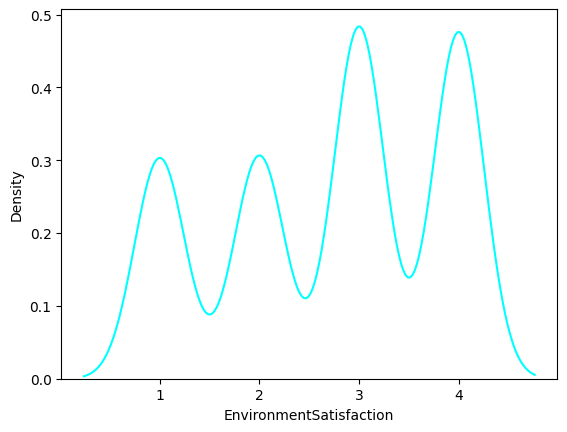

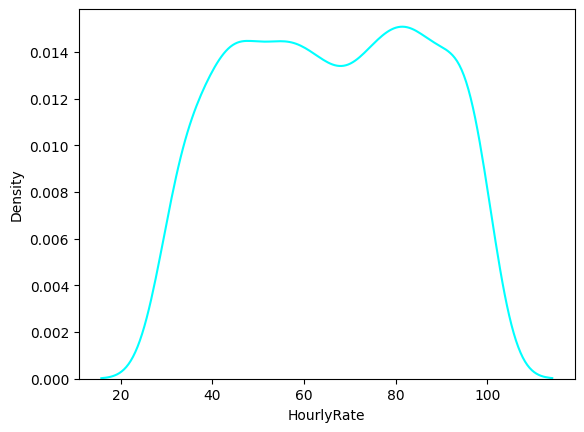

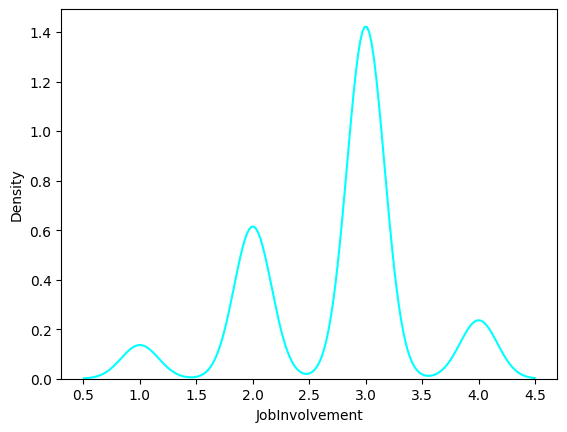

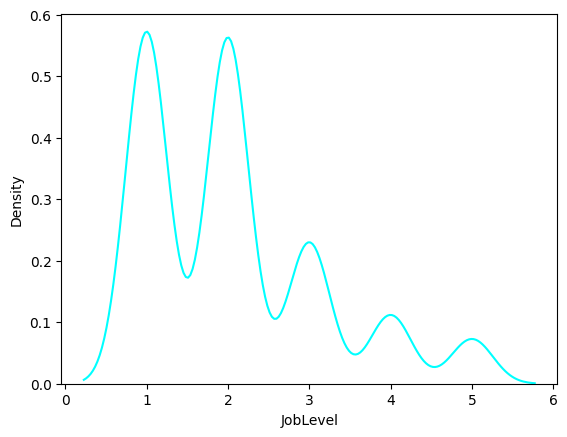

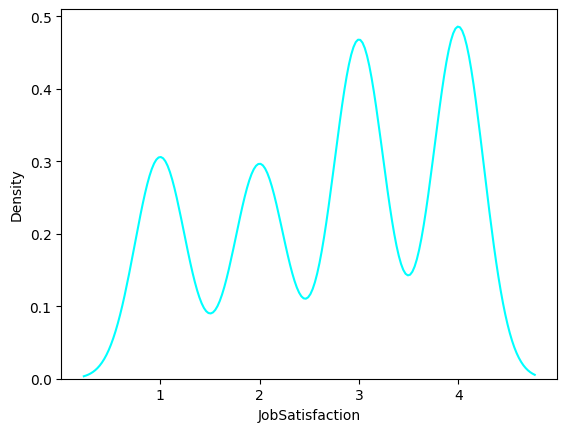

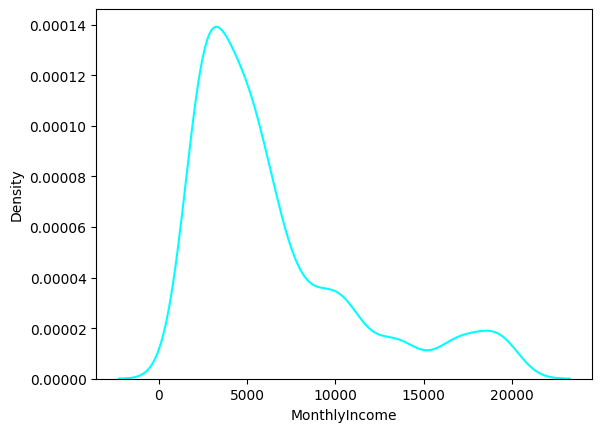

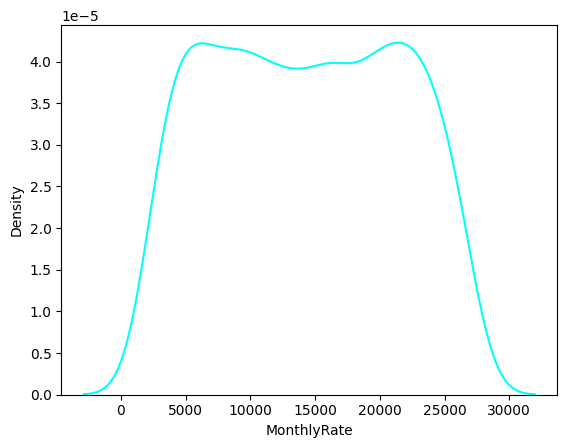

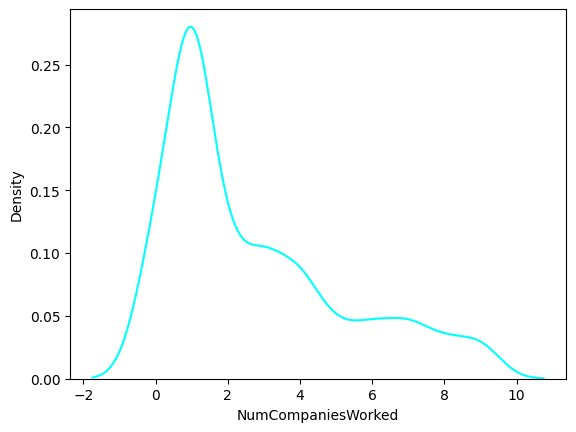

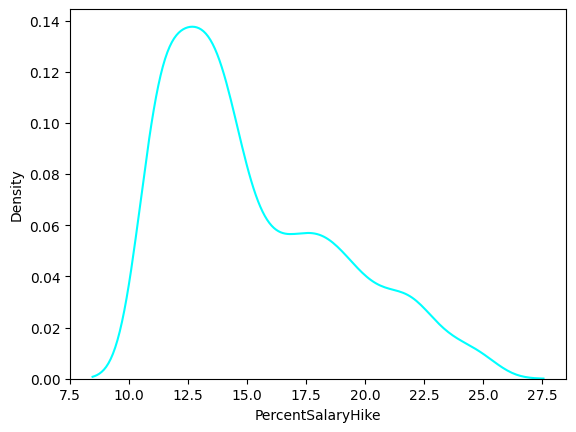

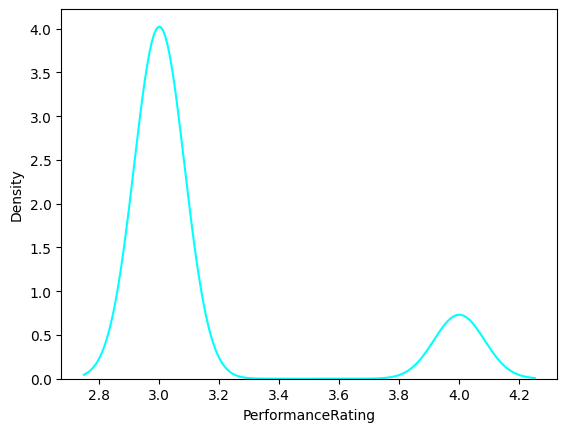

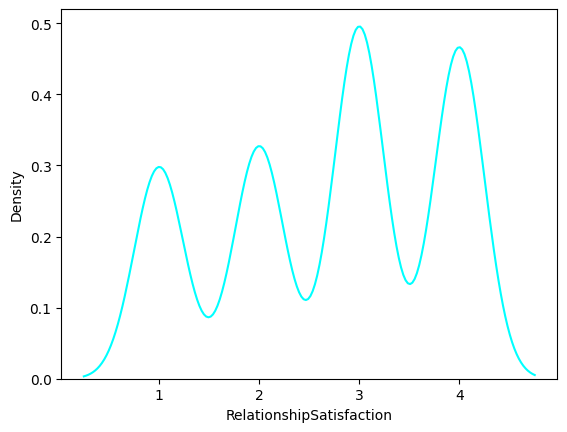

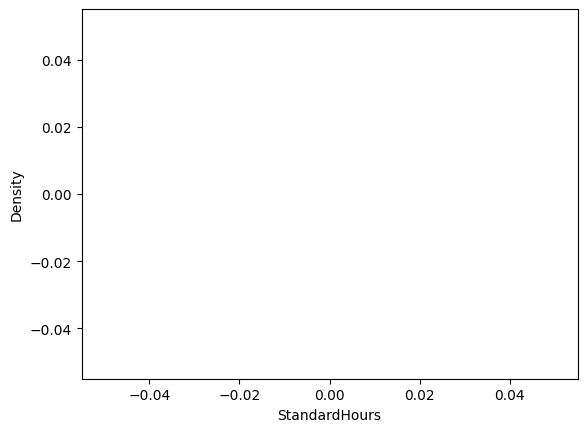

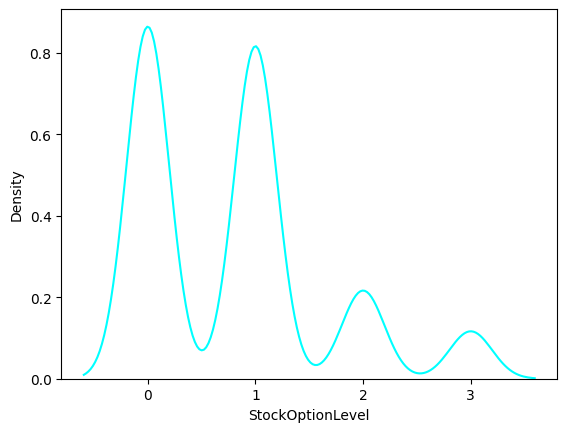

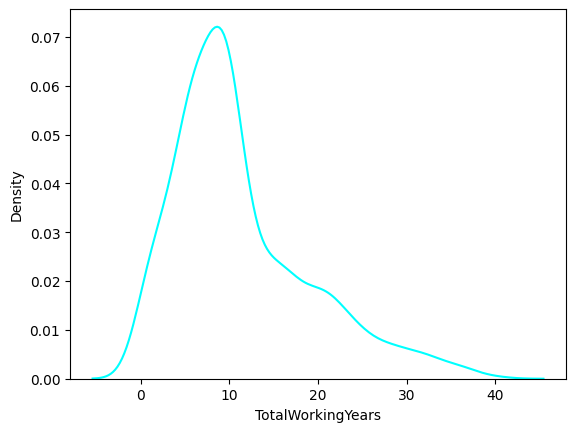

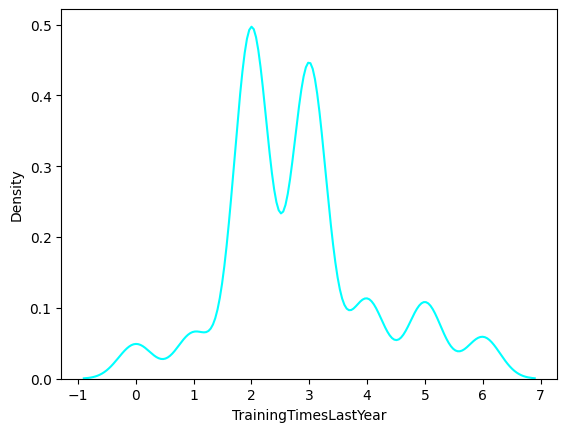

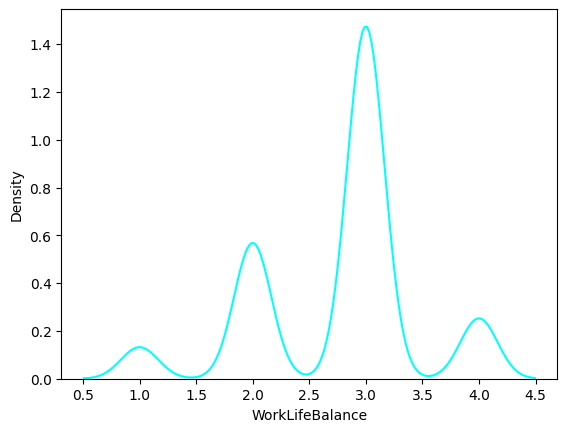

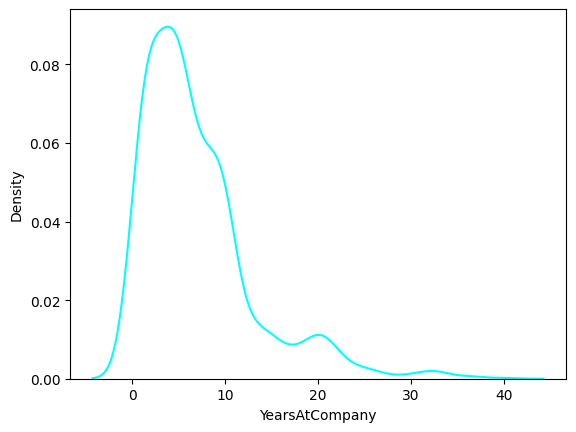

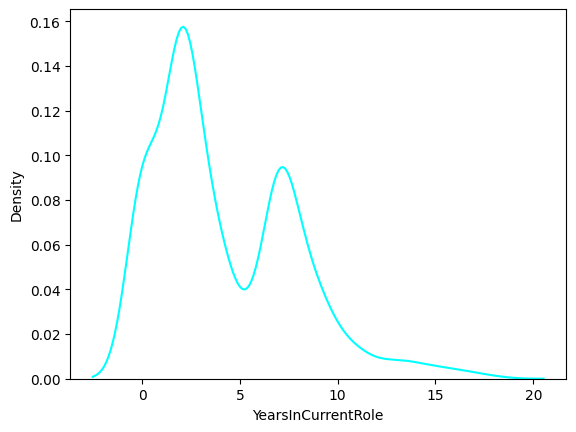

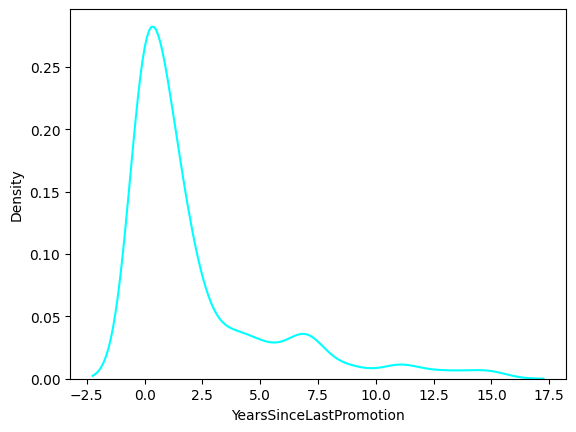

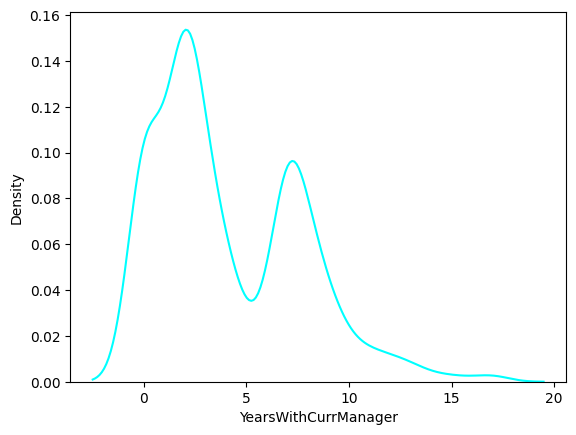

In [18]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x = data[i], color = "cyan")
        plt.show()

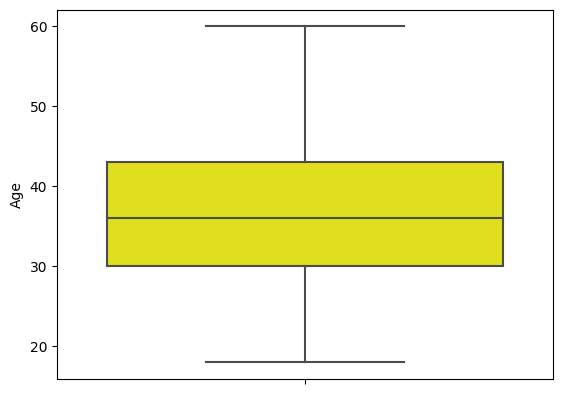

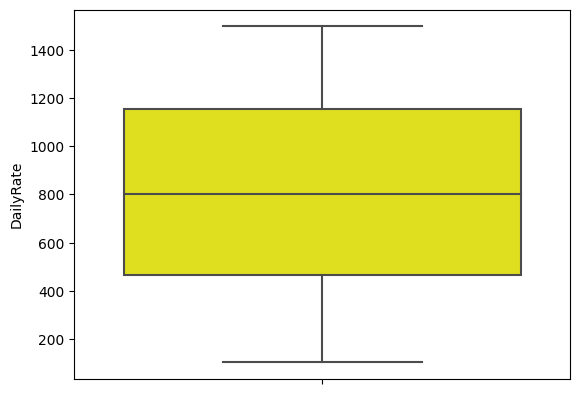

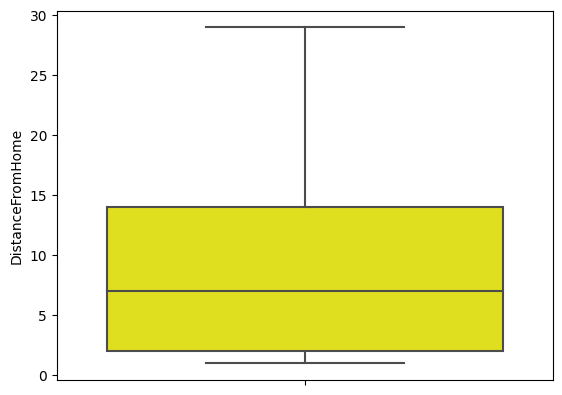

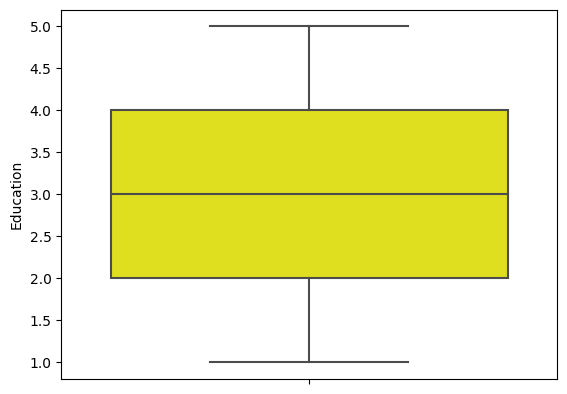

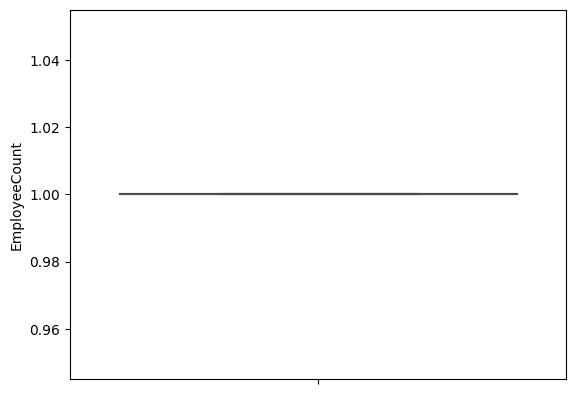

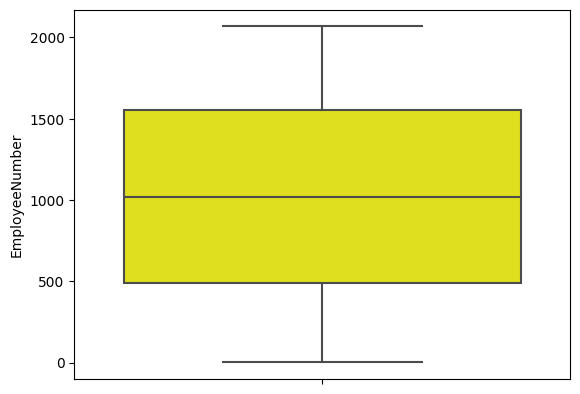

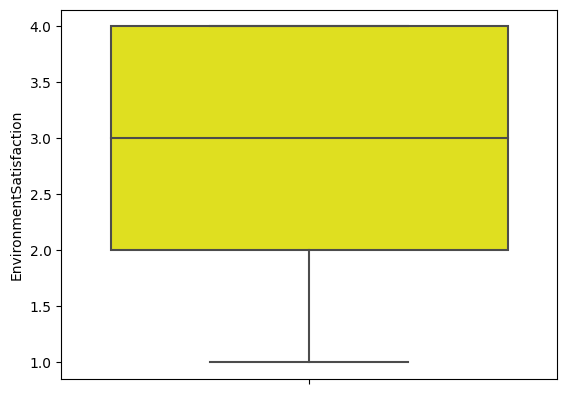

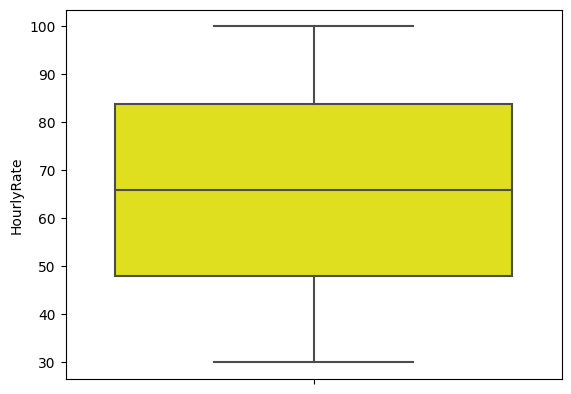

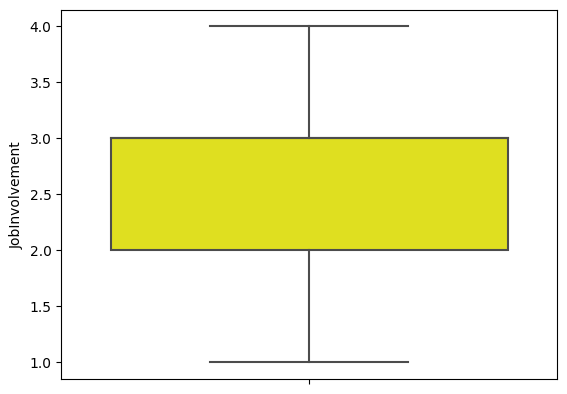

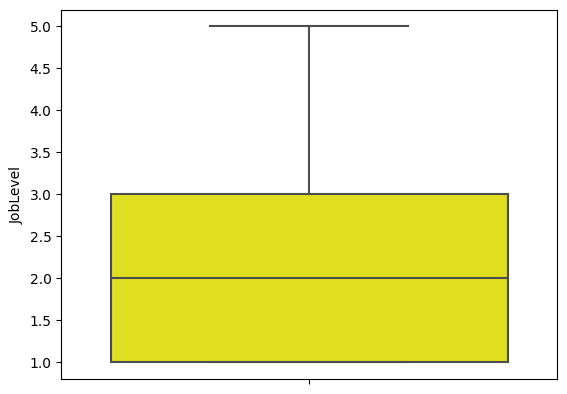

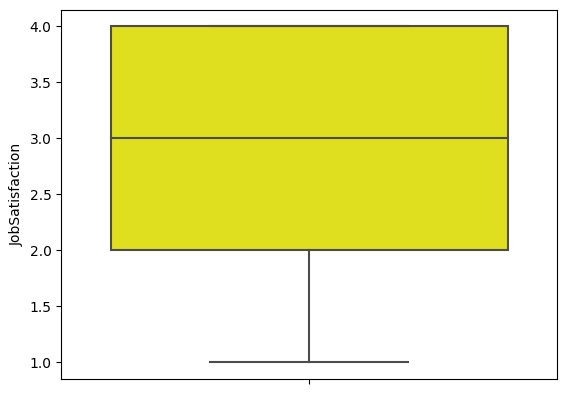

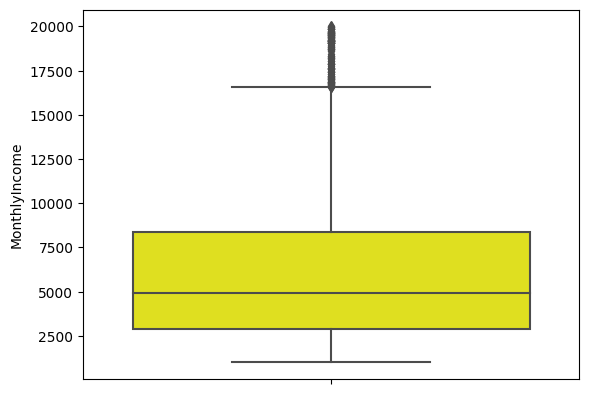

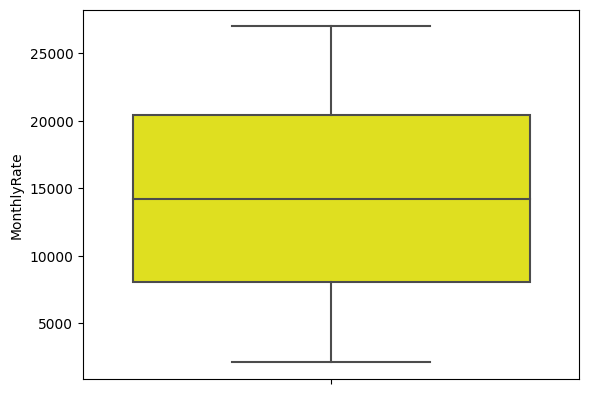

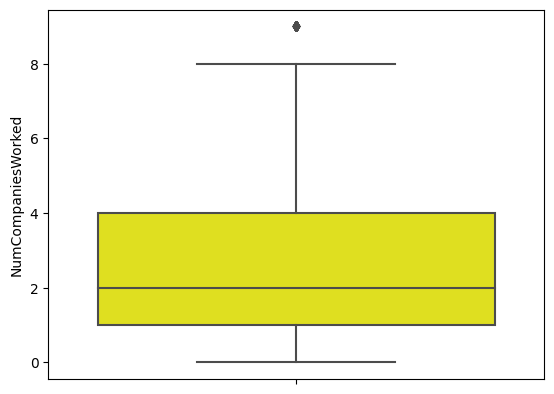

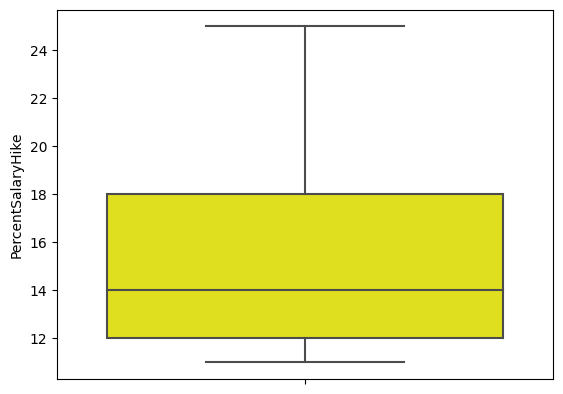

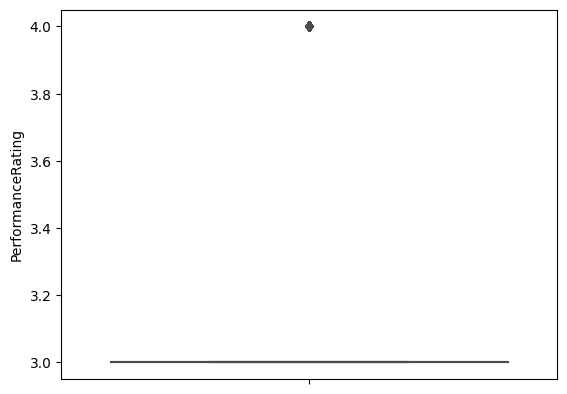

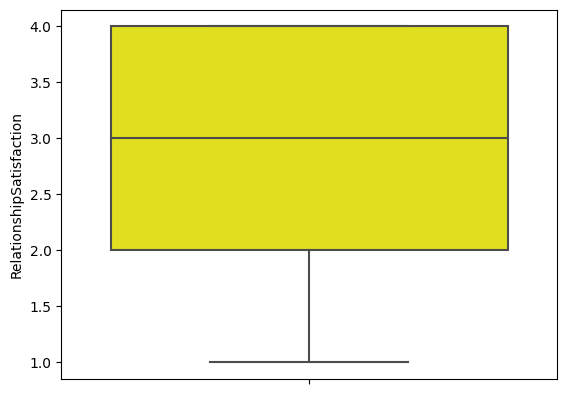

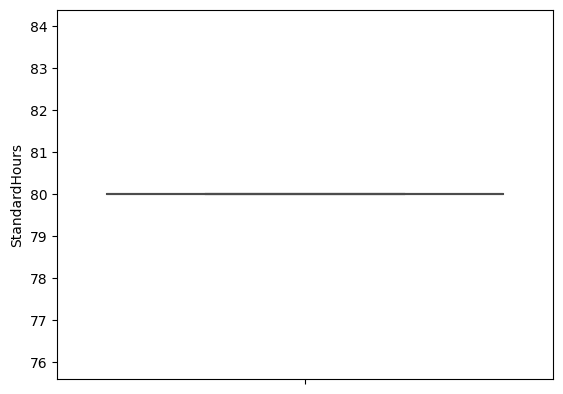

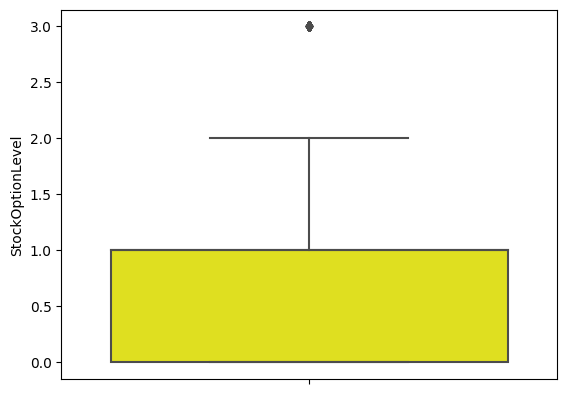

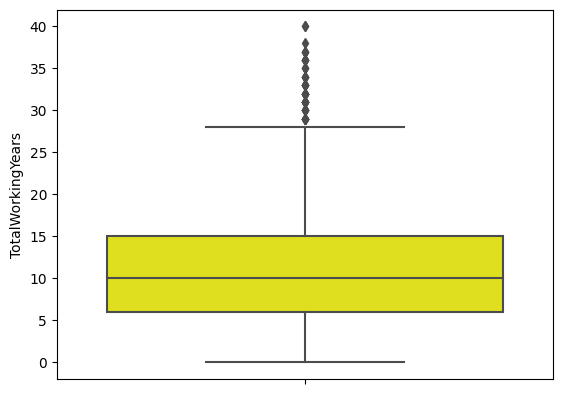

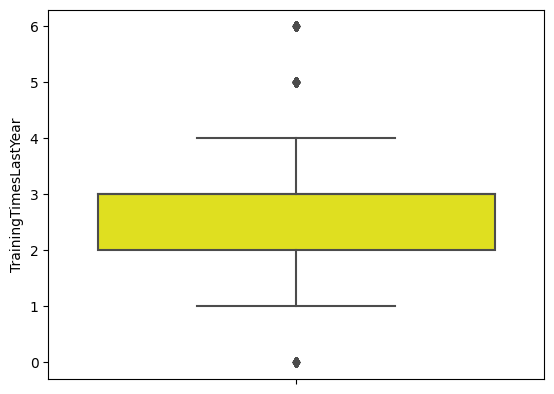

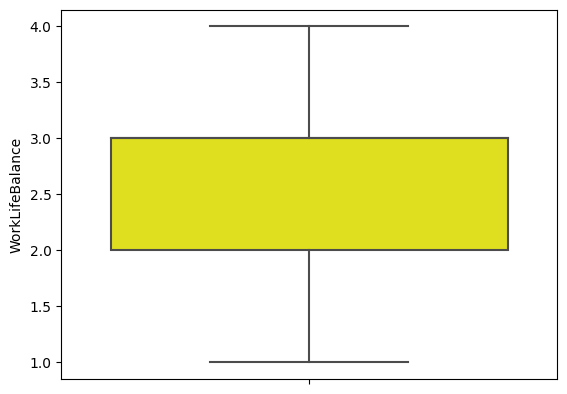

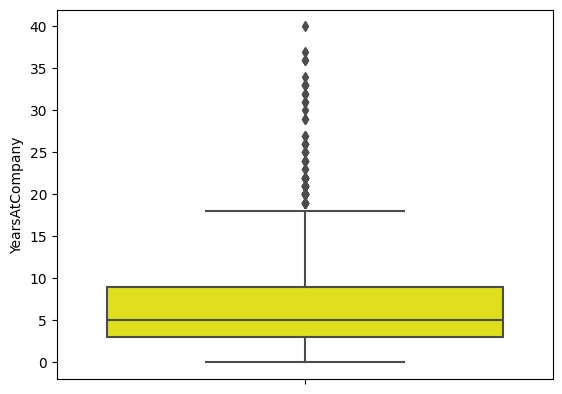

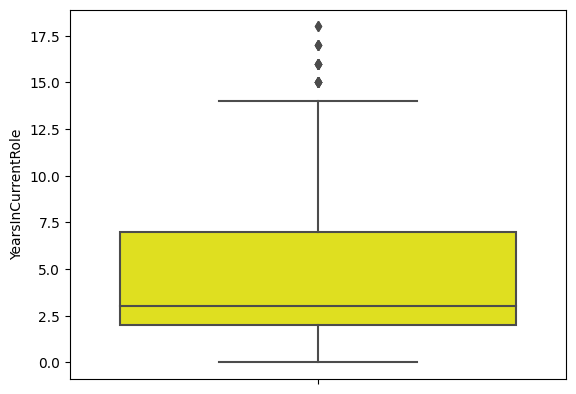

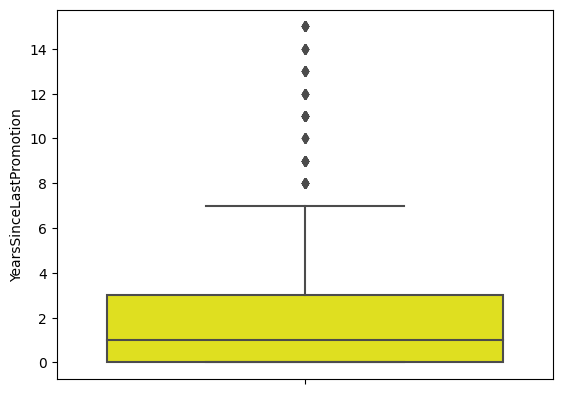

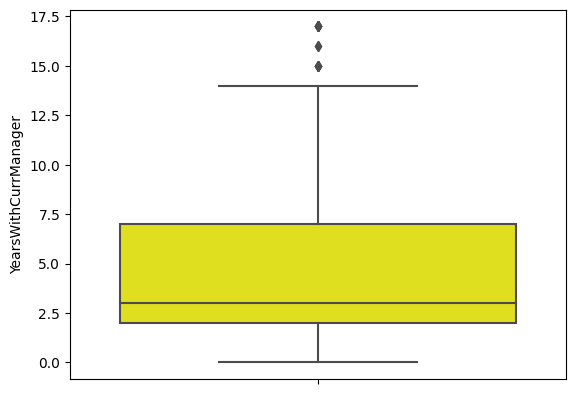

In [19]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y = data[i], color = "yellow")
        plt.show()

In [20]:
def outlier_limit(col):
    Q1 , Q3 = np.nanpercentile(col, [25, 75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return LL, UL

In [21]:
for col in data.columns:
    if data[col].dtypes != "object":
        LL, UL = outlier_limit(data[col])
        data[col] = np.where((data[col] > UL) | (data[col] < LL), np.nan, data[col])

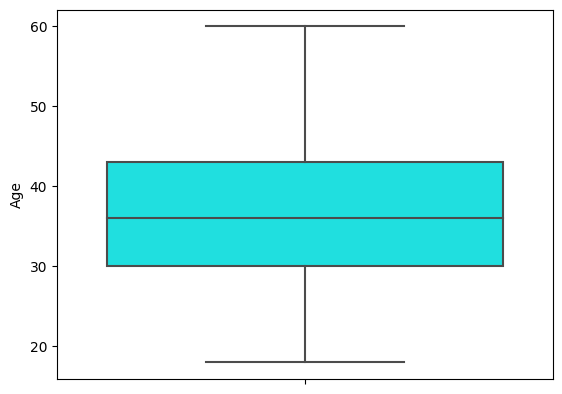

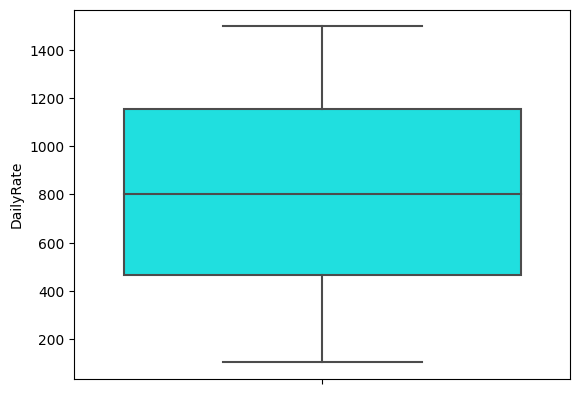

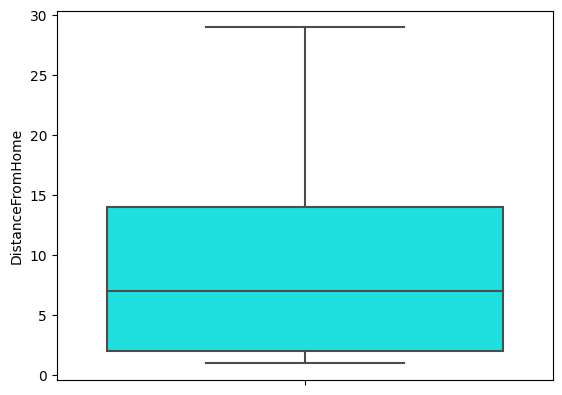

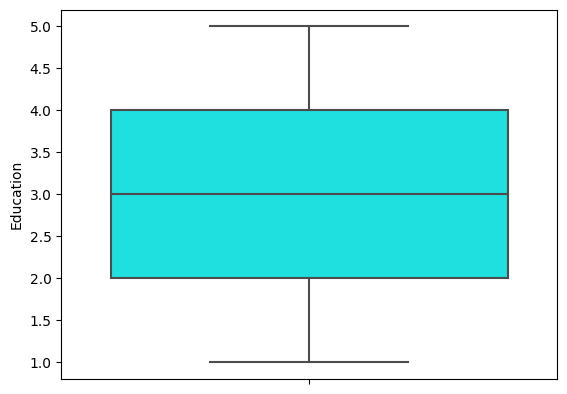

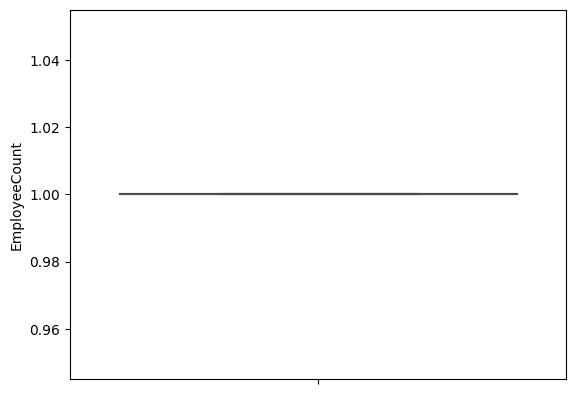

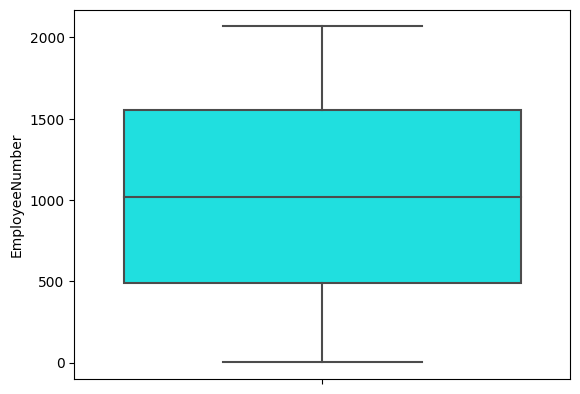

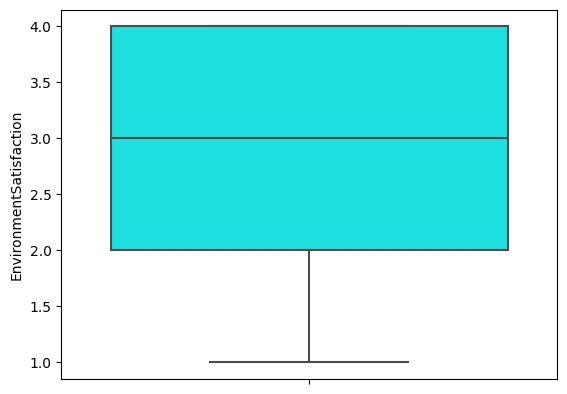

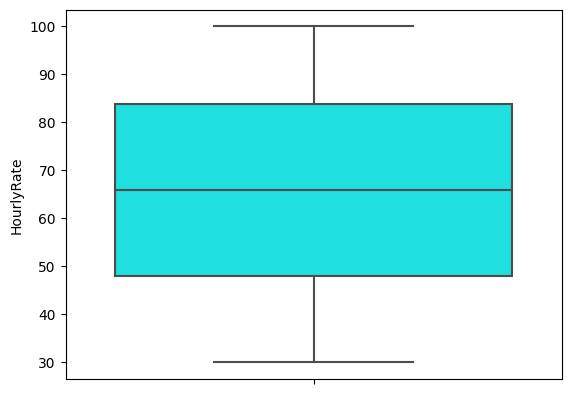

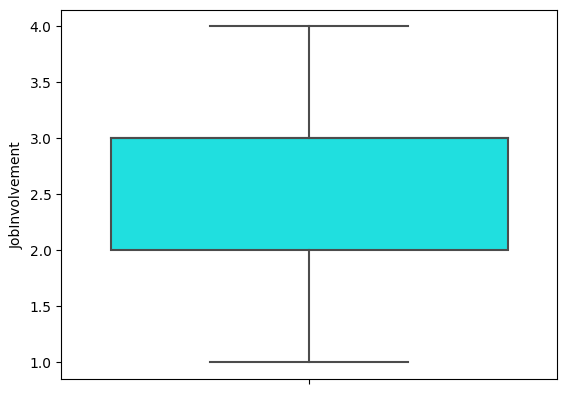

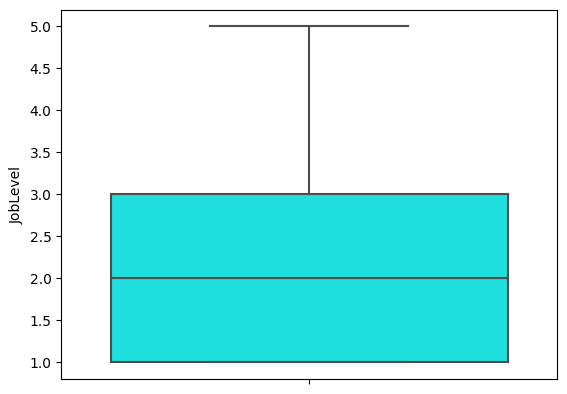

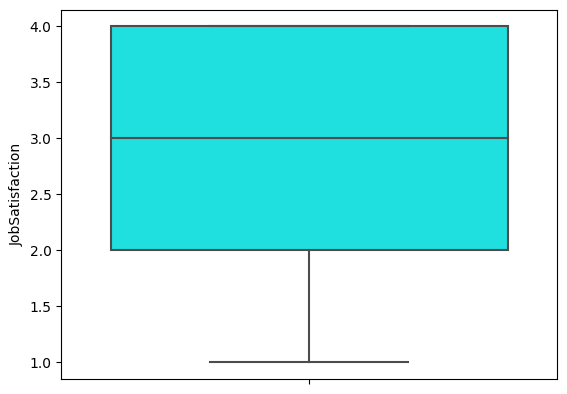

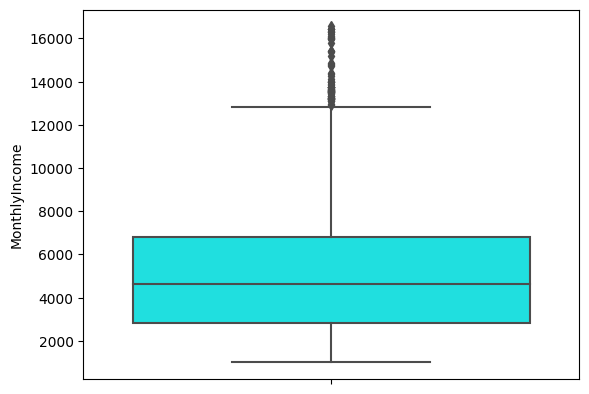

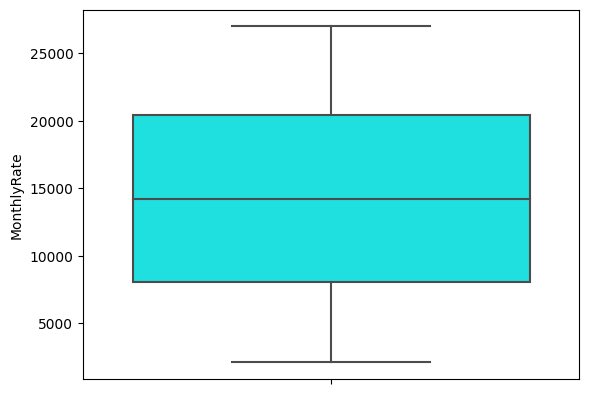

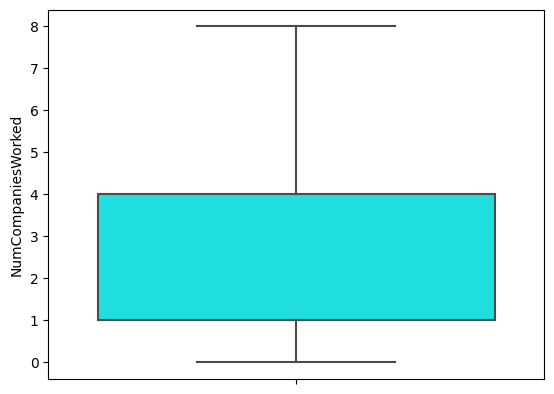

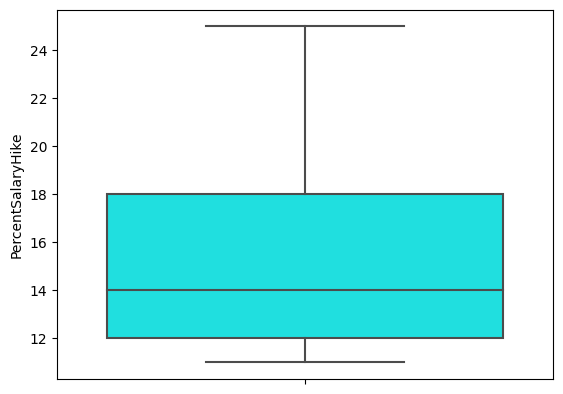

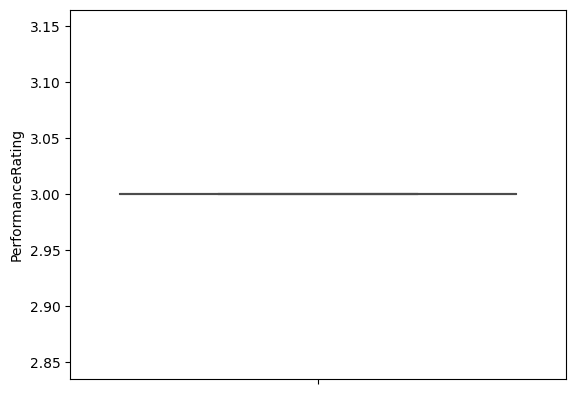

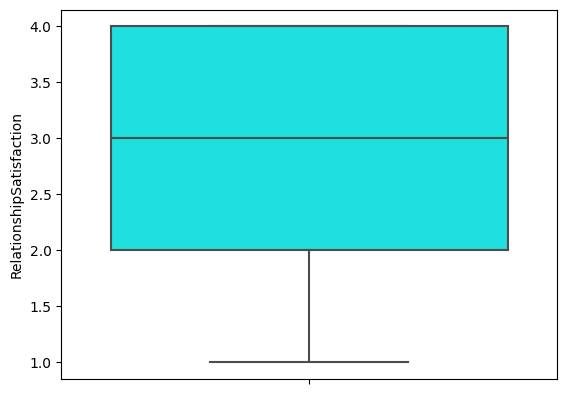

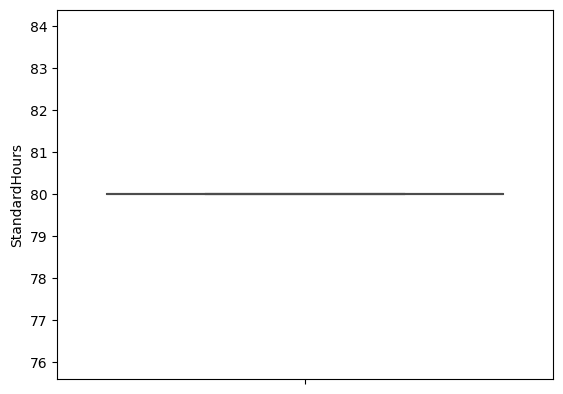

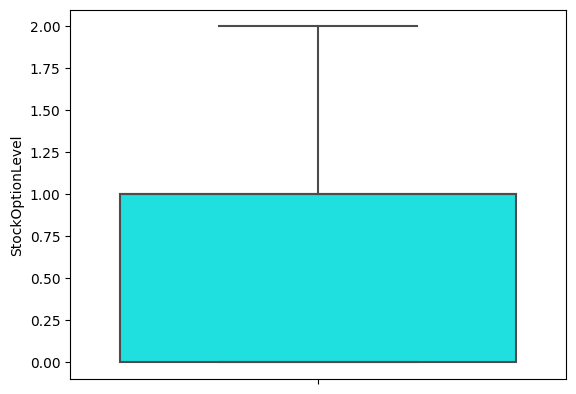

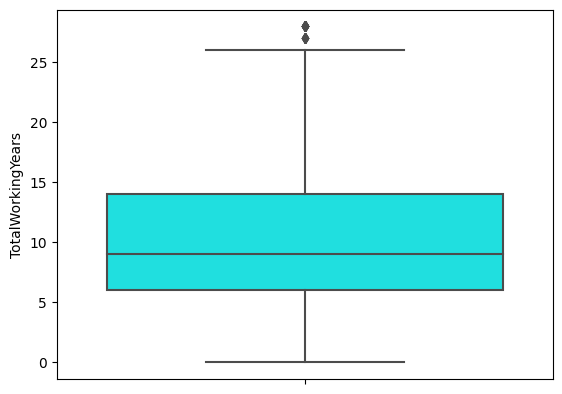

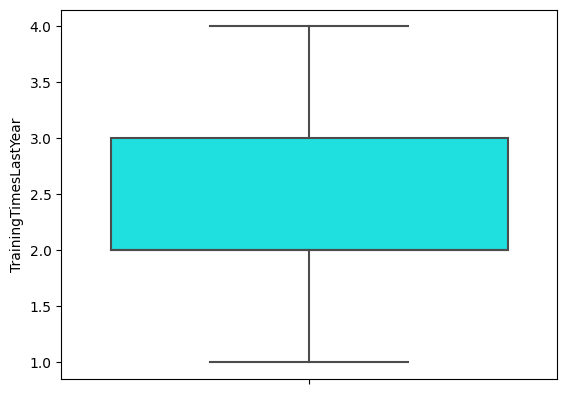

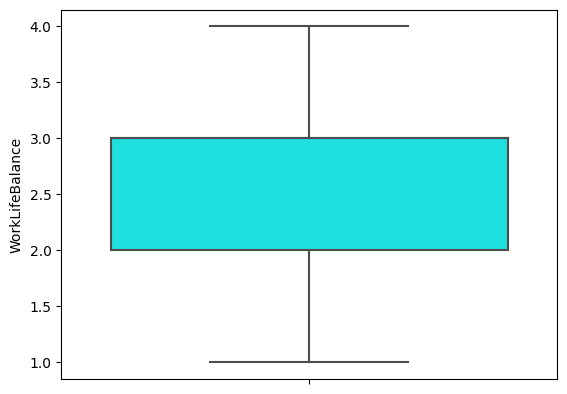

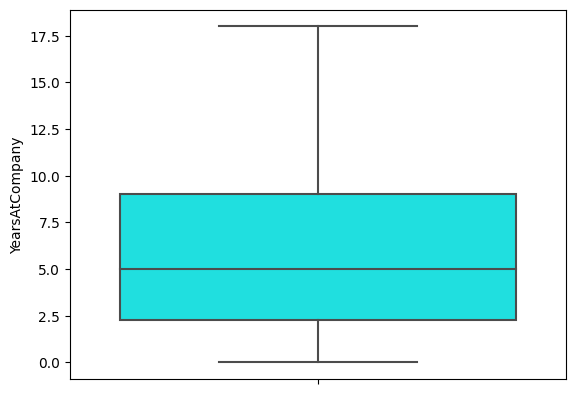

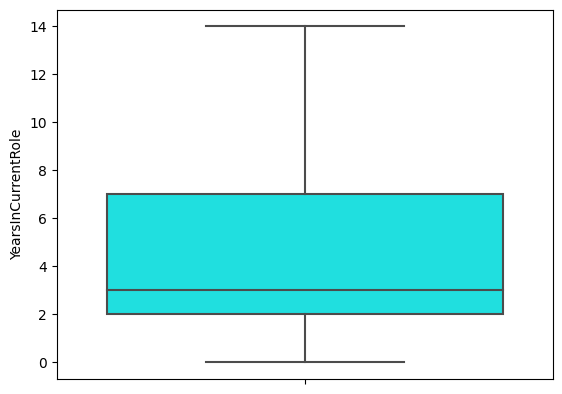

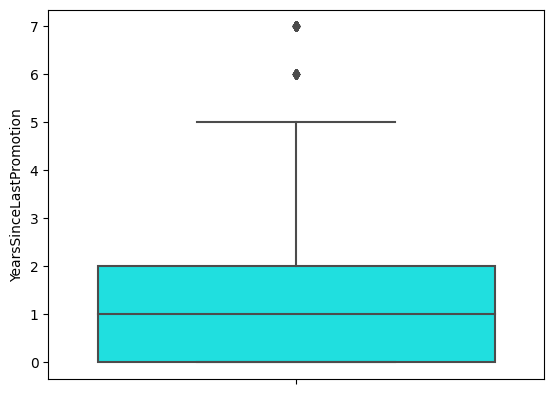

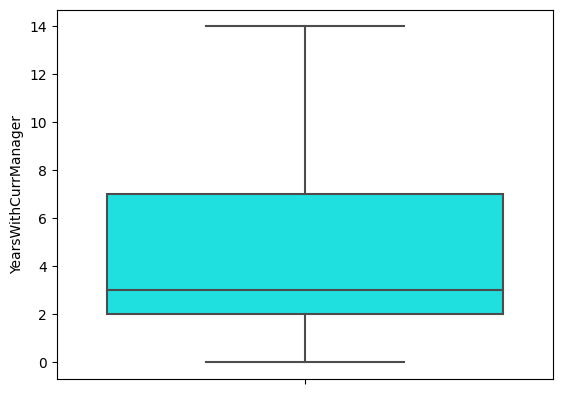

In [22]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y = data[i], color = "cyan")
        plt.show();

In [23]:
data.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating           226
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtC

## Handling Categorical Data: <a class="anchor" id="cat_data"></a>

### Data Preprocessing

#### Unique values in all columns

In [24]:
categorical_columns = ['Attrition', 'BusinessTravel', 'Department',  'EducationField','Gender', 'JobRole', 'MaritalStatus','Over18', 'OverTime']

for i in categorical_columns:
    print(f"{i}: ", data[i].unique())

Attrition:  ['Yes' 'No']
BusinessTravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:  ['Sales' 'Research & Development' 'Human Resources']
EducationField:  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:  ['Female' 'Male']
JobRole:  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:  ['Single' 'Married' 'Divorced']
Over18:  ['Y']
OverTime:  ['Yes' 'No']


#### Number of unique values in all columns

In [25]:
for i in data.columns:
    print(f"{i}: ", data[i].nunique())

Age:  43
Attrition:  2
BusinessTravel:  3
DailyRate:  886
Department:  3
DistanceFromHome:  29
Education:  5
EducationField:  6
EmployeeCount:  1
EmployeeNumber:  1470
EnvironmentSatisfaction:  4
Gender:  2
HourlyRate:  71
JobInvolvement:  4
JobLevel:  5
JobRole:  9
JobSatisfaction:  4
MaritalStatus:  3
MonthlyIncome:  1237
MonthlyRate:  1427
NumCompaniesWorked:  9
Over18:  1
OverTime:  2
PercentSalaryHike:  15
PerformanceRating:  1
RelationshipSatisfaction:  4
StandardHours:  1
StockOptionLevel:  3
TotalWorkingYears:  29
TrainingTimesLastYear:  4
WorkLifeBalance:  4
YearsAtCompany:  19
YearsInCurrentRole:  15
YearsSinceLastPromotion:  8
YearsWithCurrManager:  15


#### Columns having only one unique value

In [26]:
for i in data.columns:
    if data[i].nunique() == 1:
        print(i)

EmployeeCount
Over18
PerformanceRating
StandardHours


#### Drop these columns as they won't be useful in our predicition

In [27]:
data.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours'], inplace = True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,2.0,...,3.0,1.0,0.0,8.0,NaN,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,2.0,3.0,...,NaN,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,4.0,...,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,5.0,4.0,...,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,7.0,1.0,...,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


#### Drop EmployeeNumber column aswell

In [28]:
data.drop(columns = ['EmployeeNumber'], inplace = True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,...,3.0,1.0,0.0,8.0,NaN,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,3.0,Male,...,NaN,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,...,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,4.0,Female,...,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,...,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


#### Convert Attrition from ('Yes', 'No') to (1,0) 

In [29]:
def yesno(x):
    if x == "Yes":
        return 1
    else:
        return 0
    
data['Attrition'] = data['Attrition'].apply(yesno)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,...,3.0,1.0,0.0,8.0,NaN,1.0,6.0,4.0,0.0,5.0
1,49.0,0,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,3.0,Male,...,NaN,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,1,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,...,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,0,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,4.0,Female,...,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,0,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,...,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


#### Drop null values in the dataset

In [30]:
 data.dropna(inplace = True)

#### Convert the rest of the categorical values into numeric using dummy variables 

In [31]:
new_data = pd.get_dummies(data, drop_first = True)
new_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
2,37.0,1,1373.0,2.0,2.0,4.0,92.0,2.0,1.0,3.0,...,1,0,0,0,0,0,0,0,1,1
3,33.0,0,1392.0,3.0,4.0,4.0,56.0,3.0,1.0,3.0,...,0,0,0,0,1,0,0,1,0,1
5,32.0,0,1005.0,2.0,2.0,4.0,79.0,3.0,1.0,4.0,...,1,0,0,0,0,0,0,0,1,0
9,36.0,0,1299.0,27.0,3.0,3.0,94.0,3.0,2.0,3.0,...,0,0,0,0,0,0,0,1,0,0
11,29.0,0,153.0,15.0,2.0,4.0,49.0,2.0,2.0,3.0,...,1,0,0,0,0,0,0,0,1,1


## Features: <a class="anchor" id="feature"></a>

In [32]:
#Assigning featutres to x and target column to y

x = new_data.drop(columns = ['Attrition']) 
y = new_data['Attrition']

In [33]:
#Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()

In [34]:
xcolumns = x.columns

In [35]:
scaled_x = scaler.fit_transform(x)

In [36]:
scaled_x = pd.DataFrame(scaled_x, columns = xcolumns)
scaled_x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.195008,1.421053,-0.908788,-0.873820,1.178118,1.265559,-1.042002,-0.999575,0.270411,-1.049240,...,2.091032,-0.088102,-0.333571,-0.149364,-0.538270,-0.575868,-0.291476,-0.917392,1.365273,1.564258
1,-0.272771,1.468435,-0.786454,1.087868,1.178118,-0.490829,0.364791,-0.999575,0.270411,-0.763674,...,-0.478233,-0.088102,-0.333571,-0.149364,1.857802,-0.575868,-0.291476,1.090047,-0.732454,1.564258
2,-0.389715,0.503339,-0.908788,-0.873820,1.178118,0.631308,0.364791,-0.999575,1.178387,-0.708234,...,2.091032,-0.088102,-0.333571,-0.149364,-0.538270,-0.575868,-0.291476,-0.917392,1.365273,-0.639281
3,0.078063,1.236512,2.149558,0.107024,0.252029,1.363137,0.364791,0.331483,0.270411,0.048046,...,-0.478233,-0.088102,-0.333571,-0.149364,-0.538270,-0.575868,-0.291476,1.090047,-0.732454,-0.639281
4,-0.740549,-1.621369,0.681552,-0.873820,1.178118,-0.832349,-1.042002,0.331483,0.270411,-0.315972,...,2.091032,-0.088102,-0.333571,-0.149364,-0.538270,-0.575868,-0.291476,-0.917392,1.365273,1.564258


## Modeling: <a class="anchor" id="modeling"></a>

In [37]:
#Splitting data into training and test set

x_train, x_test, y_train, y_test = train_test_split(scaled_x,y, test_size = 0.3, random_state = 100)

#### 1. Logistic Regression

In [38]:
#Logistic Regression

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print("Accuracy score of our model is :", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix is :\n", confusion_matrix(y_test, y_pred))
print("Classification report is:\n ", classification_report(y_test, y_pred))
logisticscore = cross_val_score(lr, x_train, y_train, scoring="accuracy").mean()
print("Cross Validation Score is:", logisticscore)

Accuracy score of our model is : 0.8461538461538461
Confusion matrix is :
 [[183  17]
 [ 19  15]]
Classification report is:
                precision    recall  f1-score   support

           0       0.91      0.92      0.91       200
           1       0.47      0.44      0.45        34

    accuracy                           0.85       234
   macro avg       0.69      0.68      0.68       234
weighted avg       0.84      0.85      0.84       234

Cross Validation Score is: 0.8458715596330275


#### 2. Random Forest Classification

In [39]:
#Random Forest Classification

model = RandomForestClassifier()
model.fit(x_train,y_train)

prediction = model.predict(x_test)
print("Confusion metrics:\n" ,metrics.confusion_matrix(prediction,y_test))
print("Classification report:\n", metrics.classification_report(prediction,y_test))
rfscore = cross_val_score(model, x_train,y_train, scoring= "accuracy").mean()
print("Cross val score: ", rfscore)

Confusion metrics:
 [[198  29]
 [  2   5]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93       227
           1       0.15      0.71      0.24         7

    accuracy                           0.87       234
   macro avg       0.57      0.79      0.59       234
weighted avg       0.96      0.87      0.91       234

Cross val score:  0.8201834862385322


#### 3. Support Vector Classification

In [40]:
#Support Vector Classification

model = SVC()
model.fit(x_train,y_train)

prediction = model.predict(x_test)
print("Confusion metrics:\n" , confusion_matrix(prediction,y_test))
print("Classification report:\n", classification_report(prediction,y_test))
svmscore = cross_val_score(model, x_train,y_train, scoring= "accuracy").mean()
print("Cross val score: ", svmscore)

Confusion metrics:
 [[198  27]
 [  2   7]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       225
           1       0.21      0.78      0.33         9

    accuracy                           0.88       234
   macro avg       0.60      0.83      0.63       234
weighted avg       0.96      0.88      0.91       234

Cross val score:  0.8238532110091743


#### 4. AdaBoost Classification

In [41]:
#AdaBoost Classification

model = AdaBoostClassifier()
model.fit(x_train,y_train)

prediciton = model.predict(x_test)
print("Confusion metrics:\n" , confusion_matrix(prediction,y_test))
print("Classification report:\n", classification_report(prediction,y_test))
gradientscore = cross_val_score(model, x_train,y_train, scoring= "accuracy").mean()
print("Cross val score: ", gradientscore)

Confusion metrics:
 [[198  27]
 [  2   7]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       225
           1       0.21      0.78      0.33         9

    accuracy                           0.88       234
   macro avg       0.60      0.83      0.63       234
weighted avg       0.96      0.88      0.91       234

Cross val score:  0.820183486238532


#### Dataframe of Models with cross-validation scores

In [42]:
models = pd.DataFrame({'Models':['Random Forest Classifier','Logistic Regression', 
                                 'Gradient Boost Classifier', 'Support Vector Classifier'],
                      'Score':[rfscore, logisticscore,gradientscore,svmscore]})
models.sort_values(by='Score', ascending = False)

,Models,Score
1,Logistic Regression,0.845872
3,Support Vector Classifier,0.823853
0,Random Forest Classifier,0.820183
2,Gradient Boost Classifier,0.820183


From the above classification models, Logistic Regression Model have highest cross-validation score. 
So we continue with this model

## Saving The Final Model: <a class="anchor" id="model"></a>

#### Logistic Regression Model

In [43]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
#print("Confusion matrix is :\n", confusion_matrix(y_test, y_pred))
print("Classification report is:\n ", classification_report(y_test, y_pred))
logisticscore = cross_val_score(lr, x_train, y_train, scoring="accuracy").mean()
print("Cross Validation Score is:", logisticscore)

Classification report is:
                precision    recall  f1-score   support

           0       0.91      0.92      0.91       200
           1       0.47      0.44      0.45        34

    accuracy                           0.85       234
   macro avg       0.69      0.68      0.68       234
weighted avg       0.84      0.85      0.84       234

Cross Validation Score is: 0.8458715596330275


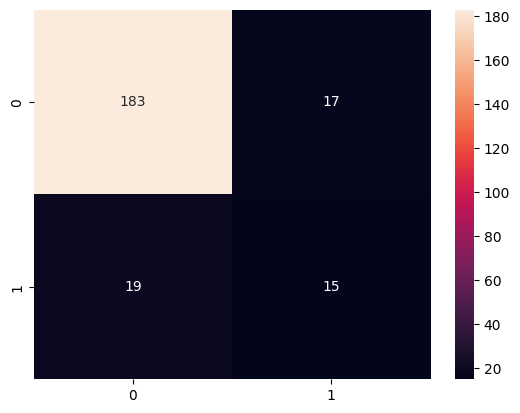

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

model used is :: AdaBoostClassifier()


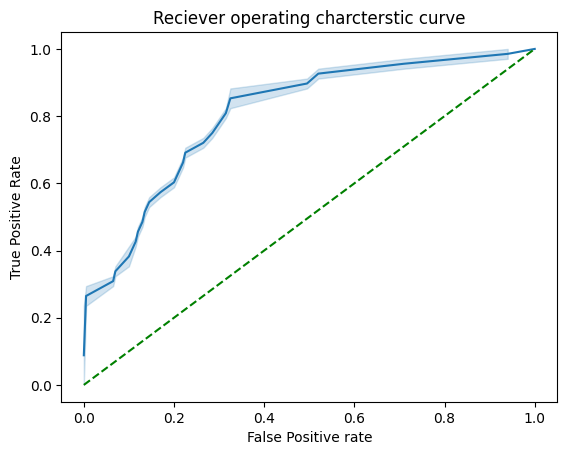

In [45]:
lr.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,thresold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("model used is ::",model)
sns.lineplot(x=fpr,y=tpr)
plt.plot([0,1],[0,1],color="green",linestyle='--')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title('Reciever operating charcterstic curve')
plt.show()